In [49]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import csv

In [50]:
fileO = open(r'C:\Users\david\Desktop\maturitni_prace\OmassCoefff.txt', 'r')
fileH = open(r'C:\Users\david\Desktop\maturitni_prace\HmassCoefff.txt', 'r')
filewater = open(r'C:\Users\david\Desktop\maturitni_prace\watermassCoefff.txt', 'r')
fileU = open(r'C:\Users\david\Desktop\maturitni_prace\UmassCoefff.txt', 'r')

molar_mass_H = 1.00784
molar_mass_O = 15.999
molar_mass_U = 238.02891

energy_as_x_to_masscoeff_U = []
masscoef_U = []
energy_as_x_to_masscoeff_O = [] #MeV
masscoef_O = [] #(cm2/g)
energy_as_x_to_masscoeff_H = [] #MeV
masscoef_H = [] #(cm2/g)
energy_as_x_to_masscoeff_water = [] #MeV
masscoef_water = [] #(cm2/g)

for line in fileU:
    energy_as_x_to_masscoeff_U.append(float(line[3:14]))
    masscoef_U.append(float(line[15:25]))

for line in fileO:
    energy_as_x_to_masscoeff_O.append(float(line[0:12]))
    masscoef_O.append(float(line[13:22]))

for line in fileH:
    energy_as_x_to_masscoeff_H.append(float(line[1:13]))
    masscoef_H.append(float(line[14:23]))

for line in filewater:
    energy_as_x_to_masscoeff_water.append(float(line[0:12]))
    masscoef_water.append(float(line[13:22]))

In [51]:
def check_energies(energy1, energy2):
    i = 0
    if len(energy1) == len(energy2):
        print("you have same nuber of x values")
        for i in range(len(energy2)):
            if energy1[i] == energy2[i]:
                pass
                #print("ok")
            else:
                print("fail in index:{}, {} is not {}\t diff: {}".format(i, energy1[i], energy2[i], energy1[i] - energy2[i]))
                i = i+1
        return i
    else:
        return "you dont have same nuber of x values"


In [52]:
def calculate_correct_masscoeff_of_substance(masscoef1=masscoef_O, masscoef2=masscoef_H, molar_mass1=molar_mass_O, molar_mass2=molar_mass_H, n1=1, n2=2):
    answ_masscoef = []
    print("{}, {}".format(len(masscoef1), len(masscoef2)))
    for i in range(len(masscoef1)):
        mass1 = molar_mass1 * n1
        mass2 = molar_mass2 * n2
        x = (masscoef1[i] * mass1 + masscoef2[i] * mass2)/(mass1 + mass2)
        answ_masscoef.append(round(x, 5))#lepe zaokrouhlovat
    return answ_masscoef

h2o_calculated = calculate_correct_masscoeff_of_substance()

36, 36


In [53]:
check_energies(h2o_calculated, masscoef_water)

you have same nuber of x values
fail in index:0, 4077.22797 is not 4078.0	 diff: -0.7720300000000861
fail in index:1, 1375.92123 is not 1376.0	 diff: -0.07877000000007683
fail in index:2, 617.26546 is not 617.3	 diff: -0.03453999999999269
fail in index:3, 192.87126 is not 192.9	 diff: -0.0287399999999991
fail in index:4, 82.77822 is not 82.78	 diff: -0.0017799999999965621
fail in index:5, 42.58734 is not 42.58	 diff: 0.007339999999999236
fail in index:6, 24.64585 is not 24.64	 diff: 0.005849999999998801
fail in index:7, 10.3725 is not 10.37	 diff: 0.002500000000001279
fail in index:8, 5.32915 is not 5.329	 diff: 0.0001500000000005386
fail in index:9, 1.67268 is not 1.673	 diff: -0.000320000000000098
fail in index:10, 0.80965 is not 0.8096	 diff: 4.999999999999449e-05
fail in index:11, 0.37556 is not 0.3756	 diff: -3.999999999998449e-05
fail in index:12, 0.26827 is not 0.2683	 diff: -2.999999999997449e-05
fail in index:13, 0.22688 is not 0.2269	 diff: -1.9999999999992246e-05
fail in ind

35

In [54]:
#   zkontroluje jestli neni nekde Nta hodonta mensi nez N+1ta hodnota,
#   coz v pripade vody by znamenalo ze je nekde chyba
#   ale v pripade oxidu uranu by to bylo k nicemu

for i in range(1,len(energy_as_x_to_masscoeff_water)):
    if h2o_calculated[i] > h2o_calculated[i-1]:
        print("something wrong at index {} and {}".format(i, i-1))

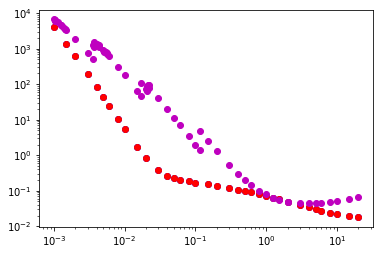

In [55]:
#plotovani
plt.scatter(energy_as_x_to_masscoeff_H, h2o_calculated, c="b")
plt.scatter(energy_as_x_to_masscoeff_water, masscoef_water, c = "r")
plt.scatter(energy_as_x_to_masscoeff_U, masscoef_U, c="m")
plt.yscale('log')
plt.xscale('log')
#je to tak dobre ze neni vidiet modra, protoze je presne na stejnejch mistech jak cervena

In [56]:
p = check_energies(energy_as_x_to_masscoeff_U, energy_as_x_to_masscoeff_O)
#u2o_calculated = calculate_correct_masscoeff_of_substance(masscoef_U, masscoef_O, molar_mass_U, molar_mass_O, 2, 1)
print(p)
print(energy_as_x_to_masscoeff_U)
print(energy_as_x_to_masscoeff_O)

you dont have same nuber of x values
[0.001, 0.0010222, 0.0010449, 0.0010449, 0.00115314, 0.0012726, 0.0012726, 0.00135409, 0.0014408, 0.0014408, 0.0015, 0.002, 0.003, 0.0035517, 0.0035517, 0.00363859, 0.0037276, 0.0037276, 0.004, 0.0043034, 0.0043034, 0.005, 0.0051822, 0.0051822, 0.00536198, 0.005548, 0.005548, 0.006, 0.008, 0.01, 0.015, 0.0171663, 0.0171663, 0.02, 0.0209476, 0.0209476, 0.0213487, 0.0217574, 0.0217574, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.115606, 0.115606, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0, 1.25, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0]
[0.001, 0.0015, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008, 0.01, 0.015, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0, 1.25, 1.5, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 15.0, 20.0]


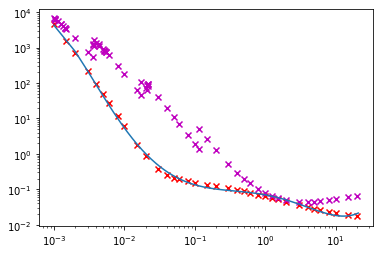

In [57]:
plt.scatter(energy_as_x_to_masscoeff_O, masscoef_O, marker="x", c="r")
plt.scatter(energy_as_x_to_masscoeff_U, masscoef_U, marker="x", c="m")

def func(E, *a):
    eff = 0
    for i in range(0,n):
        eff += a[i]*np.log(E)**i
    return eff

n=6
output = []
p0 = np.ones(n, )
x_min = 0.001
x_max = 21
x_step = 0.001

coeff, pcov = curve_fit(func, xdata=energy_as_x_to_masscoeff_O, ydata=np.log(masscoef_O), p0=p0)
coeff_err = np.sqrt(np.diag(pcov))

#pars, cov = curve_fit(f=func, xdata=energy_as_x_to_masscoeff_O, ydata=masscoef_O)
p = np.logspace(min(energy_as_x_to_masscoeff_O)-5, np.log(max(energy_as_x_to_masscoeff_O)+5), 1000000)
#plt.plot(p, np.exp(func(p, *pars)), c="red")
plt.plot(np.arange(x_min, x_max, x_step), np.exp(func(np.arange(x_min, x_max, x_step), *coeff)))
#print(pars)
plt.yscale('log')
plt.xscale('log')
#plt.ylim(ymin=0)

66, 66


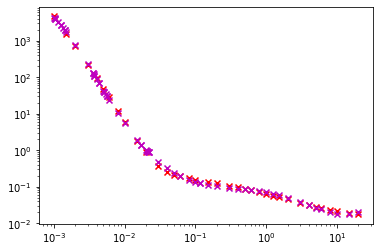

In [58]:
energy_as_x_to_masscoeff_U
masscoeff_O_calculated = []
for energy in energy_as_x_to_masscoeff_U:
    k = np.exp(func(energy, *coeff))
    masscoeff_O_calculated.append(k)

plt.scatter(energy_as_x_to_masscoeff_O, masscoef_O, marker="x", c="r")
plt.scatter(energy_as_x_to_masscoeff_U, masscoeff_O_calculated, marker="x", c="m")
plt.yscale('log')
plt.xscale('log')
masscoeff_UO2 = calculate_correct_masscoeff_of_substance(masscoeff_O_calculated, masscoef_U, molar_mass_O, molar_mass_U, 2,1)


['0.001', '6345.26323']
['0.0010222', '6104.63553']
['0.0010449', '5866.82419']
['0.0010449', '6212.37247']
['0.00115314', '5183.8157']
['0.0012726', '4298.13303']
['0.0012726', '4353.66757']
['0.00135409', '3849.73718']
['0.0014408', '3400.17892']
['0.0014408', '3461.88397']
['0.0015', '3187.40713']
['0.002', '1736.48019']
['0.003', '704.33001']
['0.0035517', '478.65888']
['0.0035517', '1131.23384']
['0.00363859', '1061.33013']
['0.0037276', '993.27555']
['0.0037276', '1407.58088']
['0.004', '1181.90179']
['0.0043034', '986.67161']
['0.0043034', '1147.10473']
['0.005', '788.81932']
['0.0051822', '720.1346']
['0.0051822', '763.59259']
['0.00536198', '701.77746']
['0.005548', '645.56482']
['0.005548', '672.89134']
['0.006', '556.7992']
['0.008', '275.17525']
['0.01', '158.51822']
['0.015', '57.77292']
['0.0171663', '41.27243']
['0.0171663', '94.48863']
['0.02', '62.7608']
['0.0209476', '55.64503']
['0.0209476', '78.01752']
['0.0213487', '83.98118']
['0.0217574', '70.82529']
['0.0217574'

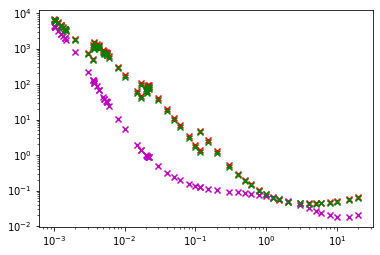

In [62]:

header = ['name', 'area', 'country_code2', 'country_code3']
data = ['Afghanistan', 652090, 'AF', 'AFG']


with open(r'C:\Users\david\Desktop\maturitni_prace\UO2massCoefff.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    for i in range(len(energy_as_x_to_masscoeff_U)):
        row = [str(energy_as_x_to_masscoeff_U[i]),  str(masscoeff_UO2[i])]
        writer.writerow(row)

plt.scatter(energy_as_x_to_masscoeff_U, masscoef_U, marker="x", c="r")
plt.scatter(energy_as_x_to_masscoeff_U, masscoeff_O_calculated, marker="x", c="m")
plt.scatter(energy_as_x_to_masscoeff_U, masscoeff_UO2, marker="x", c="g")
plt.yscale('log')
plt.xscale('log')